# Part 2. Tensorflow tutorial - Image classification

### Goal of this tutorial:
###     Build and train a model which classifies bone scan images whether they are anterior/posterior images

## (1) Labelling train images

In [ ]:
! pip install opencv-python
! pip install pandas
! pip install pydot

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image, ImageEnhance, ImageOps
from ipywidgets import widgets, HBox
from io import BytesIO
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline

In [12]:
# Load train images

train_dir = './bone_scan_data/train'
train_filelist = [os.path.join(train_dir,file) for file in os.listdir(train_dir) if file.endswith('dcm.npy')]

print('number of slices : {0}'.format(len(train_filelist)))

#train = pydicom.read_file(train_filelist[0],force=True)

number of slices : 200


In [13]:
data_list=[]
    
    
for (root, directories, files) in os.walk(train_dir):
    for d in directories:
        d_path = os.path.join(root, d)
        print(d_path)

    for file in files:
        file_path = os.path.join(root, file)
        data_list.append(file_path)

In [14]:
def imageshow (x):
    data =np.load(data_list[x]) 
    image = Image.fromarray(data)
    plt.figure(figsize=(3,10)) #사이즈 조절
    plt.imshow(X=data, cmap='gray', vmax=45)
    plt.pause(0.1)

In [15]:
def datainput():
    y=int(input("앞면(0)/뒷면(1) : ")) 
    return y

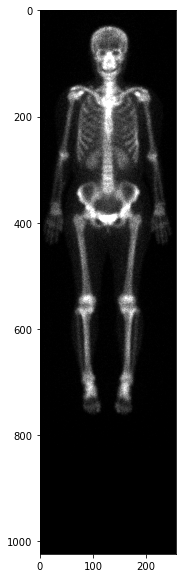

앞면(0)/뒷면(1) : 


ValueError: invalid literal for int() with base 10: ''

In [16]:
# Visualize and label images
Label_list=[]
i=0

while i != len(data_list):
    imageshow(i) 
    z=datainput()
    Label_list.append(z) 
    i=i+1


In [17]:
#input 또하지 말고 전에 했던거 불러오기

csv = pd.read_csv('C:\\jupyter project\\bone_scan_data\\train_result\\train_result.csv'
                 ,names=['path','front(0)/back(1)'],encoding='CP949',skiprows=1)
forb= csv['front(0)/back(1)']
forb_value = forb.values
forb_value
#forb_value[1:]
Label_list = forb_value

In [18]:
# save the label data as csv file
# use csv or pandas module to create & save csv file


파일리스트 = data_list
앞면뒷면리스트= Label_list

td = {
    'file' : 파일리스트,
    'front(0)/back(1)' : 앞면뒷면리스트
}



td_dataframe = pd.DataFrame(td)


td_dataframe.to_csv("C:\\jupyter project\\bone_scan_data\\train_result\\train_result.csv") #수정하기
#,index=False
print(td_dataframe)

                                                file  front(0)/back(1)
0    ./bone_scan_data/train\0026411_20180615.dcm.npy                 0
1    ./bone_scan_data/train\0044819_20140828.dcm.npy                 1
2    ./bone_scan_data/train\0089615_20161024.dcm.npy                 0
3    ./bone_scan_data/train\0099328_20121120.dcm.npy                 1
4    ./bone_scan_data/train\0099328_20131206.dcm.npy                 0
..                                               ...               ...
195  ./bone_scan_data/train\2532130_20200706.dcm.npy                 1
196  ./bone_scan_data/train\2576767_20201019.dcm.npy                 1
197  ./bone_scan_data/train\7143943_20130201.dcm.npy                 0
198  ./bone_scan_data/train\7205999_20140102.dcm.npy                 0
199  ./bone_scan_data/train\7231661_20200625.dcm.npy                 1

[200 rows x 2 columns]


## (2) Define train/validation set

In [19]:
import random
a = random.sample(range(0,200),200) #0부터 200까지의 범위중에 200개를 중복없이
print(a)

[119, 130, 42, 9, 37, 35, 104, 197, 90, 136, 187, 120, 40, 87, 166, 145, 28, 123, 162, 13, 32, 34, 160, 78, 157, 144, 168, 100, 85, 75, 124, 151, 99, 116, 44, 26, 76, 156, 191, 64, 115, 165, 23, 107, 20, 83, 132, 193, 66, 29, 141, 196, 51, 94, 186, 36, 33, 190, 178, 63, 31, 73, 1, 183, 3, 57, 108, 169, 95, 48, 106, 179, 47, 68, 149, 62, 10, 14, 18, 167, 92, 55, 11, 93, 173, 89, 150, 70, 114, 60, 45, 171, 27, 172, 159, 176, 91, 180, 7, 146, 58, 39, 25, 129, 135, 143, 24, 185, 67, 111, 19, 121, 112, 131, 126, 54, 170, 79, 41, 86, 65, 22, 98, 142, 192, 97, 158, 110, 109, 16, 105, 138, 46, 56, 74, 199, 59, 125, 49, 175, 81, 134, 72, 174, 6, 137, 140, 118, 189, 127, 188, 50, 30, 198, 82, 161, 102, 17, 128, 181, 96, 147, 154, 117, 139, 164, 53, 182, 2, 4, 152, 101, 84, 5, 122, 77, 69, 21, 8, 133, 12, 52, 43, 80, 88, 195, 155, 103, 153, 0, 71, 148, 163, 184, 113, 15, 177, 38, 61, 194]


In [20]:
x =4차원[batchsize(160), data=1024,data[index]=256, 1(rgb 여기는 흑백이므로 1)]
y =2차원[batchsize(160),1or0데이타]
x_val =[batchsize(40), 이미지,이미지, 1(rgb 여기는 흑백이므로 1)]
y_val =[batchsize(40), 1or0데이타]

SyntaxError: invalid syntax (Temp/ipykernel_16104/1299408434.py, line 1)

In [21]:
Label_list

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1], dtype=int64)

In [22]:
x = []
y = []
x_val = []
y_val = []


for i in range(160):
    index=a[i]
    data = np.load(data_list[index])
    x.append(data)
    
    label = Label_list[index]
    y.append(label)

    
for i in range(40):
    index=a[i+160]
    data = np.load(data_list[index])
    x_val.append(data)

    label = Label_list[index]
    y_val.append(label)
    

In [23]:
x = np.expand_dims(x, axis=3)
x_val = np.expand_dims(x_val, axis=3)

In [24]:
#y = np.expand_dims(y, axis=1)
#y_val = np.expand_dims(y_val, axis=1)

In [25]:
np.save('x.npy', x)
np.save('y.npy', y)
np.save('x_val.npy', x_val)
np.save('y_val.npy', y_val)

In [26]:
x = np.load('x.npy')
y = np.load('y.npy')
x_val = np.load('x_val.npy')
y_val = np.load('y_val.npy')

In [27]:
x = x.reshape((160, 1024, 256, 1))
y = y.reshape((160,))
x_val = x_val.reshape((40, 1024, 256, 1))
y_val = y_val.reshape((40,))

In [28]:
print(np.shape(x))
print(np.shape(y))
print(np.shape(x_val))
print(np.shape(y_val))


(160, 1024, 256, 1)
(160,)
(40, 1024, 256, 1)
(40,)


In [29]:
y = np.expand_dims(y, -1)
y_val = np.expand_dims(y_val, -1)

## (3) Build and train CNN model

### Method 1 : Sequential API

In [96]:
model = tf.keras.Sequential([
    #tf.keras.layers.Conv2D(...)
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(1024, 256, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'), 
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'), 
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'), 
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")  
])



In [97]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1022, 254, 32)     320       
                                                                 
 batch_normalization (BatchN  (None, 1022, 254, 32)    128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 511, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 509, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 509, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [98]:
tf.keras.backend.clear_session()

In [99]:
# 5. 모델 컴파일하기
model.compile(optimizer='adam',
              loss='binary_crossentropy', #
              metrics=['accuracy'])

In [100]:
print(np.shape(np.array(x))) 
print(np.shape(np.array(y))) 

(160, 1024, 256, 1)
(160, 1)


In [101]:
x = np.array(x, dtype='float32')
y = np.array(y, dtype='float32')

In [102]:
# 6. 훈련하기
results=model.fit(x,
          y,
          epochs=100,
          validation_data=(x_val,y_val)
         )
#batch_size, validation_steps

Epoch 1/100
5/5 [==============================] - 1s 129ms/step - loss: 0.5021 - accuracy: 0.7688 - val_loss: 1.9700 - val_accuracy: 0.5750
Epoch 2/100
5/5 [==============================] - 1s 103ms/step - loss: 0.1407 - accuracy: 1.0000 - val_loss: 3.4506 - val_accuracy: 0.5000
Epoch 3/100
5/5 [==============================] - 1s 103ms/step - loss: 0.0736 - accuracy: 1.0000 - val_loss: 2.3329 - val_accuracy: 0.5750
Epoch 4/100
5/5 [==============================] - 1s 107ms/step - loss: 0.0424 - accuracy: 1.0000 - val_loss: 1.3264 - val_accuracy: 0.6500
Epoch 5/100
5/5 [==============================] - 1s 104ms/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 0.5591 - val_accuracy: 0.8000
Epoch 6/100
5/5 [==============================] - 1s 104ms/step - loss: 0.0291 - accuracy: 1.0000 - val_loss: 0.3275 - val_accuracy: 0.8500
Epoch 7/100
5/5 [==============================] - 1s 103ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.1833 - val_accuracy: 0.9500
Epoch 8/100
5

### Method 2 : Functional API

In [4]:
def simple_cnn():
    model_input = tf.keras.Input(input_shape)
    x = tf.keras.layers.Conv2D(...)(model_input)
    ...
    ...
    prediction = ...
    
    model = tf.keras.Model(model_input, prediction)
    
    return model

In [5]:
tf.keras.backend.clear_session()

NameError: name 'tf' is not defined

In [256]:
def simple_cnn():
    input_shape = (1024,256,1)
    model_input = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=16, activation='relu')(model_input)
    #x =layers.BatchNormalization(),
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32, activation='relu')(x)
    #x = layers.BatchNormalization(),
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, activation='relu')(x)
    #x = layers.BatchNormalization(),
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, activation='relu')(x)
    #x = layers.BatchNormalization(),
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    #x = layers.BatchNormalization(),
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    
    
    # Output layer
    predictions = tf.keras.layers.Dense(2, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs=model_input, outputs=predictions)
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    
    
    
    return model

functional_model = simple_cnn()

In [257]:
functional_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024, 256, 1)]    0         
                                                                 
 conv2d (Conv2D)             (None, 1022, 254, 16)     160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 511, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 509, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 254, 62, 32)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 252, 60, 64)       18496 

In [258]:
results_api = functional_model.fit(x,y, epochs=100,validation_data=(x_val,y_val))

Epoch 1/100
5/5 [==============================] - 1s 67ms/step - loss: 7.7810 - accuracy: 0.6438 - val_loss: 0.5280 - val_accuracy: 0.8000
Epoch 2/100
5/5 [==============================] - 0s 47ms/step - loss: 0.3455 - accuracy: 0.9438 - val_loss: 0.3611 - val_accuracy: 0.8500
Epoch 3/100
5/5 [==============================] - 0s 47ms/step - loss: 0.1410 - accuracy: 0.9875 - val_loss: 0.1964 - val_accuracy: 0.9500
Epoch 4/100
5/5 [==============================] - 0s 47ms/step - loss: 0.0297 - accuracy: 1.0000 - val_loss: 0.4215 - val_accuracy: 0.9250
Epoch 5/100
5/5 [==============================] - 0s 46ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.1031 - val_accuracy: 0.9500
Epoch 6/100
5/5 [==============================] - 0s 49ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1895 - val_accuracy: 0.9500
Epoch 7/100
5/5 [==============================] - 0s 49ms/step - loss: 1.0235e-04 - accuracy: 1.0000 - val_loss: 0.4509 - val_accuracy: 0.9000
Epoch 8/100
5/5 

Epoch 58/100
5/5 [==============================] - 0s 46ms/step - loss: 1.8172e-06 - accuracy: 1.0000 - val_loss: 0.2303 - val_accuracy: 0.9500
Epoch 59/100
5/5 [==============================] - 0s 47ms/step - loss: 1.8000e-06 - accuracy: 1.0000 - val_loss: 0.2304 - val_accuracy: 0.9500
Epoch 60/100
5/5 [==============================] - 0s 46ms/step - loss: 1.7859e-06 - accuracy: 1.0000 - val_loss: 0.2305 - val_accuracy: 0.9500
Epoch 61/100
5/5 [==============================] - 0s 47ms/step - loss: 1.7620e-06 - accuracy: 1.0000 - val_loss: 0.2305 - val_accuracy: 0.9500
Epoch 62/100
5/5 [==============================] - 0s 46ms/step - loss: 1.7442e-06 - accuracy: 1.0000 - val_loss: 0.2298 - val_accuracy: 0.9500
Epoch 63/100
5/5 [==============================] - 0s 48ms/step - loss: 1.7255e-06 - accuracy: 1.0000 - val_loss: 0.2302 - val_accuracy: 0.9500
Epoch 64/100
5/5 [==============================] - 0s 46ms/step - loss: 1.7024e-06 - accuracy: 1.0000 - val_loss: 0.2298 - val_ac

### Method 3 : Model sub-classing

In [ ]:
# define a optimizer/metrics and compile the model

model.compile(...)


# print summary of this model
model.summary()

In [ ]:
# Start training

model_history = model.fit(...)

## (4) Plot loss and metrics

In [3]:
print(results_api.history['loss'])
print(results_api.history['acc'])
print(results_api.history['val_loss'])
print(results_api.history['val_acc'])

NameError: name 'results_api' is not defined

In [ ]:
model_history.epoch
model_history.history





## (5) Predict on test set images

In [144]:
# Load train images

test_dir = './bone_scan_data/test'
test_filelist = [os.path.join(test_dir,file) for file in os.listdir(test_dir) if file.endswith('dcm.npy')]

print('number of slices : {0}'.format(len(test_filelist)))


number of slices : 200


In [145]:
data_test_list=[]
    
    
for (root, directories, files) in os.walk(test_dir):
    for d in directories:
        d_path = os.path.join(root, d)
        #print(d_path)

    for file in files:
        file_path = os.path.join(root, file)
        #print(file_path)
        data_test_list.append(file_path)

In [146]:
def imageshow (x):
    data_test =np.load(data_test_list[x]) 
    image_test = Image.fromarray(data_test)
    plt.figure(figsize=(3,10)) #사이즈 조절
    plt.imshow(X=data_test, cmap='gray', vmax=45)
    plt.pause(0.1)

In [147]:
def datainput():
    y=int(input("앞면(0)/뒷면(1) : ")) 
    return y

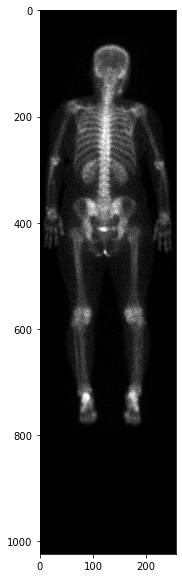

앞면(0)/뒷면(1) : 


ValueError: invalid literal for int() with base 10: ''

In [148]:
# Visualize and label images
Label_test_list=[]
i=0

while i != len(data_test_list):
    imageshow(i) 
    z=datainput()
    Label_test_list.append(z) 
    i=i+1


In [149]:
#input 또하지 말고 전에 했던거 불러오기

import pandas as pd

csv_test = pd.read_csv('C:\\jupyter project\\bone_scan_data\\test_result\\test_result.csv'
                 ,names=['path','front(0)/back(1)'],encoding='CP949',skiprows=1)
forb_test= csv_test['front(0)/back(1)']
forb_test_value = forb_test.values
forb_test_value
#forb_test_value[1:]
Label_test_list = forb_test_value
print(Label_test_list)
len(Label_test_list)

[1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0
 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0
 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]


200

In [150]:
# save the label data as csv file
# use csv or pandas module to create & save csv file


테스트파일리스트 = data_test_list
테스트앞면뒷면리스트= Label_test_list

td_test = {
    'file' : 테스트파일리스트,
    'front(0)/back(1)' : 테스트앞면뒷면리스트
}



td_test_dataframe = pd.DataFrame(td_test)


td_test_dataframe.to_csv("C:\\jupyter project\\bone_scan_data\\test_result\\test_result.csv") #수정하기
#,index=False
print(td_test_dataframe)

                                               file  front(0)/back(1)
0    ./bone_scan_data/test\0010133_20160721.dcm.npy                 1
1    ./bone_scan_data/test\0014133_20180309.dcm.npy                 0
2    ./bone_scan_data/test\0047248_20180112.dcm.npy                 1
3    ./bone_scan_data/test\0051720_20150824.dcm.npy                 0
4    ./bone_scan_data/test\0059794_20190531.dcm.npy                 0
..                                              ...               ...
195  ./bone_scan_data/test\7020095_20180330.dcm.npy                 1
196  ./bone_scan_data/test\7020095_20190403.dcm.npy                 1
197  ./bone_scan_data/test\7063943_20201221.dcm.npy                 1
198  ./bone_scan_data/test\7073946_20160404.dcm.npy                 0
199  ./bone_scan_data/test\7080003_20190603.dcm.npy                 0

[200 rows x 2 columns]


In [168]:
#import random
#b = random.sample(range(0,200),200) #램덤o
b = list(range(200)) #램덤x


In [169]:
x_test = []
y_test = []


for i in range(200):
    index=b[i]
    data_test = np.load(data_test_list[index])
    x_test.append(data_test)
    label_test = Label_test_list[index]
    y_test.append(label_test)

In [170]:
x_test = np.expand_dims(x_test, axis=3)

In [171]:
np.save('x_test.npy', x_test)
np.save('y_test.npy', y_test)

In [172]:
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [173]:
print(np.shape(x_test))
print(np.shape(y_test))

(200, 1024, 256, 1)
(200,)


In [174]:
model.evaluate(x_test, y_test) 
-결과 보고 과적합인지 판별하기

SyntaxError: invalid syntax (Temp/ipykernel_16104/109762155.py, line 2)

In [228]:
# predict

y_predict = model.predict(x_test)
print(y_predict)

[[9.9529392e-01]
 [8.8266367e-01]
 [1.4480922e-04]
 [9.9784172e-01]
 [1.9798381e-04]
 [9.9705029e-01]
 [2.5789752e-03]
 [9.9964297e-01]
 [9.8969102e-01]
 [9.6172875e-01]
 [7.4445315e-02]
 [9.8655850e-01]
 [3.5172161e-05]
 [9.9262261e-01]
 [7.4993709e-06]
 [9.9964714e-01]
 [3.3810997e-04]
 [2.4795556e-03]
 [9.9887902e-01]
 [1.5102050e-03]
 [7.8829915e-05]
 [2.0040333e-02]
 [3.0719902e-04]
 [9.9471223e-01]
 [3.7631646e-03]
 [5.3832360e-04]
 [7.1541166e-05]
 [1.0923227e-05]
 [3.0489542e-04]
 [4.9111620e-04]
 [9.9910033e-01]
 [9.9822634e-01]
 [9.9047029e-01]
 [3.0060831e-04]
 [2.4658314e-06]
 [3.0387321e-01]
 [7.8715308e-04]
 [2.6155764e-04]
 [4.2725016e-05]
 [9.9972445e-01]
 [9.9991834e-01]
 [6.9415451e-05]
 [9.9982053e-01]
 [9.9902844e-01]
 [9.9674487e-01]
 [9.7368658e-01]
 [9.8676378e-01]
 [3.5698459e-04]
 [9.8977345e-01]
 [9.9950445e-01]
 [9.9978644e-01]
 [9.9921477e-01]
 [1.3924856e-03]
 [4.7282702e-03]
 [1.3735353e-06]
 [4.5927416e-05]
 [9.1716874e-01]
 [9.8999363e-01]
 [9.9937218e-0

In [259]:

y_predict = functional_model.predict(x_test)
print(y_predict)

[[2.23252830e-08 1.23554962e-02]
 [1.16850896e-09 7.77296691e-07]
 [1.63683426e-02 4.22530816e-10]
 [3.27173066e-09 8.83405097e-03]
 [9.58203524e-03 2.21496848e-08]
 [7.47108952e-09 9.30528156e-03]
 [7.93702260e-04 4.55269378e-10]
 [1.44794523e-08 1.72965378e-02]
 [1.50678758e-09 8.50370794e-04]
 [4.64187888e-09 1.09011470e-03]
 [8.34034779e-08 1.86068061e-09]
 [3.35142296e-11 1.34430593e-03]
 [6.45069033e-03 1.00380056e-12]
 [8.43168512e-14 5.97390637e-04]
 [1.09769222e-04 5.76773917e-17]
 [7.83736548e-11 2.04496970e-03]
 [2.29071546e-03 1.52070685e-13]
 [8.95333869e-06 1.00251585e-10]
 [4.86106652e-13 9.22478968e-04]
 [2.97105744e-05 1.16320434e-11]
 [8.07804929e-04 6.31972807e-10]
 [1.91611180e-04 1.58117128e-08]
 [1.76111760e-04 9.10301091e-14]
 [1.46562665e-10 4.01266897e-03]
 [1.56155565e-05 1.94138150e-09]
 [3.49941343e-04 1.61481217e-09]
 [6.96381612e-04 3.50828545e-14]
 [2.79597007e-05 3.13153061e-14]
 [3.17687495e-03 4.30328395e-09]
 [5.83961746e-03 8.42392996e-12]
 [7.398792

In [176]:
print(Label_test_list)

[1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0
 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0
 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]


In [177]:
#accuracy = [np.abs(y_predict[i]-Label_test_list[i]) for i in range (200)]
#accuracy

In [266]:
loss_and_metrics = model.evaluate(x,y)
print('## train evaluation loss and_metrics ##')
print(loss_and_metrics)

5/5 [==============================] - 1s 31ms/step - loss: 3.6692e-04 - accuracy: 1.0000
## train evaluation loss and_metrics ##
[0.00036691970308311284, 1.0]


In [267]:
loss_and_metrics = model.evaluate(x_test,y_test)#test는 파일순서랜덤으로 안함
print('## test evaluation loss and_metrics ##')
print(loss_and_metrics)

7/7 [==============================] - 0s 25ms/step - loss: 0.0580 - accuracy: 0.9850
## test evaluation loss and_metrics ##
[0.05797300860285759, 0.9850000143051147]


In [180]:
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


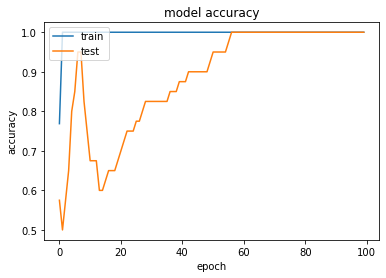

In [244]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

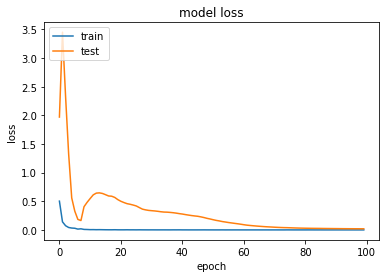

In [232]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

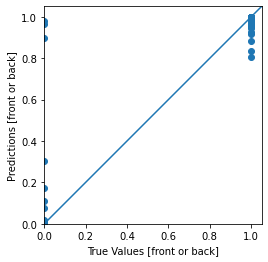

In [188]:
test_predictions = model.predict(x_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [front or back]')
plt.ylabel('Predictions [front or back]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

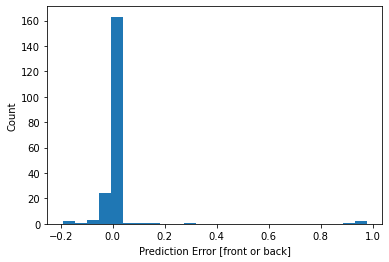

In [189]:
#오차 분포
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [front or back]")
_ = plt.ylabel("Count")

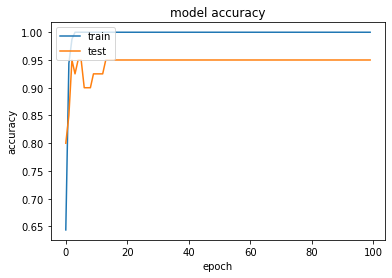

In [260]:
plt.plot(results_api.history['accuracy'])
plt.plot(results_api.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

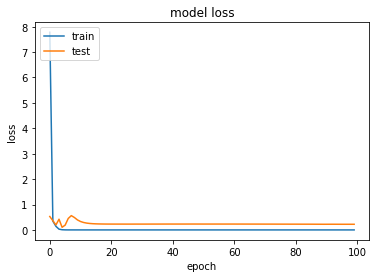

In [261]:
plt.plot(results_api.history['loss'])
plt.plot(results_api.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

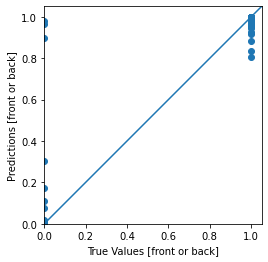

In [262]:
test_predictions_api = functional_model.predict(x_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [front or back]')
plt.ylabel('Predictions [front or back]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [263]:
#오차 분포
error_api = test_predictions_api - y_test
plt.hist(error_api, bins = 25)
plt.xlabel("Prediction Error [front or back]")
_ = plt.ylabel("Count")

ValueError: operands could not be broadcast together with shapes (400,) (200,) 